# MNIST_TensorFlow
今回はtensorfowのDNNを使い、MNISTを深層学習していきます。

# 必要なライブラリのインポート

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split

# データのインポート

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

#プリセットのMNIST　one hotもしてくれる
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## データの分割

In [3]:
#trainとtestで分割
train, target = mnist.train.next_batch(500)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [5]:
train.shape[1]

784

# 層の設計

In [6]:
# 層の数
input_unit = train.shape[1]
h_unit = [100,100,100]
out_unit = 10

In [7]:
# trainと教師データの特徴量と出力クラス数
x = tf.placeholder(tf.float32,[None,input_unit],name = "x")
t = tf.placeholder(tf.float32,[None,out_unit],name = "t")

In [8]:
# W = tf.Variable(tf.zeros([784, 10]))
# b = tf.Variable(tf.zeros([10]))
# y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
# 中間層目
W1 = tf.Variable(tf.truncated_normal([input_unit,h_unit[0]], mean=0.0, stddev=0.05),name = "W1")
b1 =  tf.Variable(tf.zeros([h_unit[0]]),name = "b1")

#バッチノーマライゼーションとrelu
xd = tf.layers.batch_normalization(tf.matmul(x,W1)+b1, training=True)
h1 = tf.nn.relu(xd,name = "h1")

In [10]:
# W1 = tf.Variable(tf.truncated_normal([input_unit,h_unit[0]], mean=0.0, stddev=0.05))
# b1 =  tf.Variable(tf.zeros([h_unit[0]]))
# h1 = tf.nn.relu(tf.matmul(x,W1)+ b1)

In [11]:
# 出力層
W2 = tf.Variable(tf.truncated_normal([h_unit[0],out_unit],mean=0.0, stddev=0.05),name = "W2")
b2 = tf.Variable(tf.zeros([out_unit]),name = "b2")
y  = tf.nn.softmax(tf.matmul(h1,W2)+ b2,name = "y")

In [12]:
# W2 = tf.Variable(tf.truncated_normal([h_unit[0],h_unit[1]]))
# b2 = tf.Variable(tf.zeros([h_unit[1]]))
# h2 = tf.nn.relu(tf.matmul(h1,W2)+ b2)

In [13]:
# W3 = tf.Variable(tf.truncated_normal([h_unit[1],out_unit]))
# b3 = tf.Variable(tf.zeros([out_unit]))
# y  = tf.nn.softmax(tf.matmul(h2,W3)+ b3)

In [14]:
# W4 = tf.Variable(tf.truncated_normal([h_unit[2],out_unit]))
# b4 = tf.Variable(tf.zeros([out_unit]))
# y = tf.nn.softmax(tf.matmul(h3,W4)+b4)

# 損失関数と正答率
テンソルボードで見やすくするために関数に名前をつけます。

In [15]:
#交差エントロピー　関数に名前付け
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))

In [16]:
# cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))

In [17]:
# バックプロパゲーション　関数に名前付け
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [18]:
# 正答率　関数に名前付け
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(t,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
#セッションの作成
sess = tf.Session()
# 重みバイアスの初期化
sess.run(tf.global_variables_initializer())

# 学習

In [2]:
def fitting(train,target,ite,bach):
    for epoch in range(ite):
        train, target = mnist.train.next_batch(bach)
        sess.run(train_step, feed_dict={x:train,t:target})
        if epoch % 10 == 0:
            acc_val = sess.run(accuracy,feed_dict={x:train,t:target})
            print ('epoch: %d, Accuracy: %f'%(epoch, acc_val))

    classified = correct_prediction.eval(session=sess, feed_dict={
        x:train,
        t:target})

    prob = y.eval(session=sess,feed_dict={
        x:train,
        t:target})


In [20]:
for epoch in range(100):
    train, target = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:train,t:target})
    if epoch % 10 == 0:
        acc_val = sess.run(accuracy,feed_dict={x:train,t:target})
        print ('epoch: %d, Accuracy: %f'%(epoch, acc_val))

classified = correct_prediction.eval(session=sess, feed_dict={
    x:train,
    t:target
})

prob = y.eval(session=sess,feed_dict={
    x:train,
    t:target
})


epoch: 0, Accuracy: 0.610000
epoch: 10, Accuracy: 0.940000
epoch: 20, Accuracy: 0.980000
epoch: 30, Accuracy: 1.000000
epoch: 40, Accuracy: 0.970000
epoch: 50, Accuracy: 1.000000
epoch: 60, Accuracy: 0.990000
epoch: 70, Accuracy: 0.980000
epoch: 80, Accuracy: 1.000000
epoch: 90, Accuracy: 0.990000


# TensorBoardの保存

In [21]:
tf.summary.FileWriter('XOR', sess.graph)
merged = tf.summary.merge_all()

実行が終わったら、ターミナルを開いて以下を打ち込みましょう。  
$ tensorboard --logdir=/ディレクトリの絶対パス/XOR

# テストデータを使った検証

In [22]:
for epoch in range(600):
    sess.run(train_step, feed_dict={x:X_train,t:y_train})
    if epoch % 100 == 0:
        acc_val = sess.run(accuracy,feed_dict={x:X_test,t:y_test})
        print ('epoch: %d, Accuracy: %f'%(epoch, acc_val))

classified = correct_prediction.eval(session=sess, feed_dict={
    x:train,
    t:target
})

prob = y.eval(session=sess,feed_dict={
    x:train,
    t:target
})


epoch: 0, Accuracy: 0.880000
epoch: 100, Accuracy: 0.860000
epoch: 200, Accuracy: 0.870000
epoch: 300, Accuracy: 0.860000
epoch: 400, Accuracy: 0.860000
epoch: 500, Accuracy: 0.840000


正答率１００％にはなりませんでしたが、良く学習できています。

# 交差検証

In [23]:
#KFoldを使い交差検証

In [40]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [41]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from statistics import mean, median,variance,stdev

In [42]:
fit_data = [[],[]]
iterater = KFold(n_splits=3)
for epoch in range(10):
    for train_index, test_index in iterater.split(train):
        X_train, X_test = train[train_index], train[test_index]
        y_train, y_test = target[train_index], target[test_index]
        sess.run(train_step, feed_dict={x:X_train,t:y_train})
    if epoch % 1 == 0:
        acc_val = sess.run(accuracy,feed_dict={x:X_train,t:y_train})
        test_acc_val = sess.run(accuracy,feed_dict={x:X_test,t:y_test})
        print ('epoch: %d, Accuracy: %f,test_Accuracy:%f'%(epoch, acc_val,test_acc_val))
        fit_data[0].append(acc_val)
        fit_data[1].append(test_acc_val)

epoch: 0, Accuracy: 0.955224,test_Accuracy:0.909091
epoch: 1, Accuracy: 0.985075,test_Accuracy:1.000000
epoch: 2, Accuracy: 1.000000,test_Accuracy:1.000000
epoch: 3, Accuracy: 1.000000,test_Accuracy:1.000000
epoch: 4, Accuracy: 1.000000,test_Accuracy:1.000000
epoch: 5, Accuracy: 1.000000,test_Accuracy:1.000000
epoch: 6, Accuracy: 1.000000,test_Accuracy:1.000000
epoch: 7, Accuracy: 1.000000,test_Accuracy:1.000000
epoch: 8, Accuracy: 1.000000,test_Accuracy:1.000000
epoch: 9, Accuracy: 1.000000,test_Accuracy:1.000000


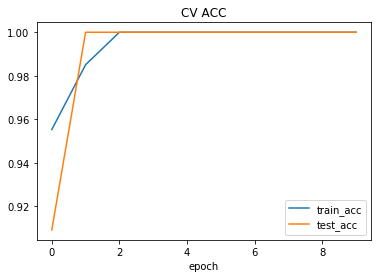

In [43]:
plt.plot([i for i in range(10)],fit_data[0],label = "train_acc")
plt.plot([i for i in range(10)],fit_data[1],label = "test_acc")
plt.xlabel('epoch')
plt.title("CV ACC")
plt.legend()


交差検証でしっかり過学習を起こしてない事もわかりました。

# kerasで深層学習

検証も含めて正則化(バッチノーマライゼーション)せずに学習

In [28]:
# モデルの作成
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# モデルのインスタンスを生成
model = Sequential()

#addで層を増やす
model.add(Dense(100, activation='relu', input_dim=784,name = "relu"))
model.add(Dense(10, activation='softmax',name="softmax"))

#compile(self, optimizer, loss, metrics=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
#訓練過程の設定
model.compile(optimizer=Adam(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


Using TensorFlow backend.


In [29]:
x_train, y_train = mnist.train.next_batch(2000)

In [30]:
x_test, y_test = mnist.test.next_batch(300)

In [31]:
#verbose: 0, 1または2．詳細表示モード．0とすると標準出力にログを出力しません． 
#1の場合はログをプログレスバーで標準出力，2の場合はエポックごとに1行のログを出力します．
hist = model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1, validation_data= (x_test, y_test))

Train on 2000 samples, validate on 300 samples
Epoch 1/100
2000/2000 [==============================] - 1s 323us/step - loss: 1.6929 - acc: 0.5290 - val_loss: 1.0745 - val_acc: 0.7533
Epoch 2/100
2000/2000 [==============================] - 0s 150us/step - loss: 0.7925 - acc: 0.8120 - val_loss: 0.6078 - val_acc: 0.8500

In [32]:
score = model.evaluate(x_test, y_test)
print('Test loss:',score[0])
print("Test acc",score[1])

300/300 [==============================] - 0s 95us/step
Test loss: 0.2699870303273201
Test acc 0.9166666666666666


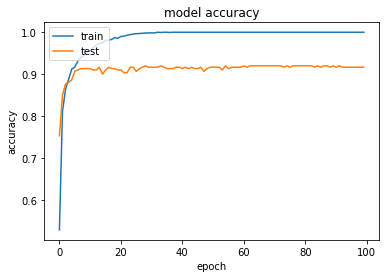

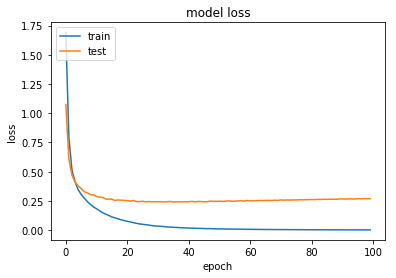

In [33]:
#Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

正則化しないと、過学習を起こしてしまうことがわかりました。

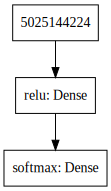

In [34]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
relu (Dense)                 (None, 100)               78500     
_________________________________________________________________
softmax (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
